<h1 style="color: #5e9ca0;"><span style="font-size: 36px;"><span style="background-color: rgb(255, 255, 255); color: rgb(41, 105, 176);">Pipelines</span><br></span></h1>

<img src="https://p4.wallpaperbetter.com/wallpaper/586/209/104/grand-canal-rialto-bridge-venice-italy-wallpaper-preview.jpg"
     width="1000"
     height="401"
     title="Fuente: Venecian Canal - www.wallperpaper.es ">

<h2 style="color: #054978;">CONTENIDO</h2>
<a id='Notebook'></a>

1. [Introducción](#intro)
2. [Dataset](#dataset)
3. [Análisis](#analisis)
4.[Entrenamiento y testeo](#traintest)
5.[El Pipeline](#pipeline)
6.[Tipos de datos](#typedata)
7. [Las columnas adecuadas](#rightcols)
8. [El Modelo](#model)
9. [Evaluando el modelo](#metrics)
10.[Un paso más allá](#beyond)
11.[ Conclusiones](#conclusions)
12. [Fuentes](#fuentes)



<a id='intro'></a>
<h2 style="color: #2e6c80;">Introducción</h2>

Los pipelines (tuberías) son una herramienta extremadamente simple pero muy útil para gestionar flujos de trabajo de machine learning.

Una tarea típica de machine learning generalmente implica la preparación de datos EDA. No entraremos en la amplia gama de actividades que componen la preparación de datos aquí, pero hay muchas . 
	Estas tareas son conocidas por ocupar una gran parte del tiempo dedicado a cualquier tarea de machine learning.

Los pasos que se suelen seguir al trabajar con datos son la limpieza del conjunto de datos se limpia desde un estado inicial potencial de confusión masiva, sin embargo, todavía hay varios menos intensivo pero no por ello menos importantes pasos de preprocesamiento de datos de transformación, tales como la extracción de características , escala característica , y la reducción de dimensionalidad , por nombrar sólo algunos .

Tal vez el preprocesamiento requiera solo una de estas transformaciones, como alguna forma de escalado. Pero tal vez necesites encadenar varias transformaciones juntas, y finalmente terminar con un estimador de algún tipo. Aquí es donde los [**pipelines**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de Scikit-learn pueden ser útiles.


  <img src="https://cdn.hipwallpaper.com/i/17/86/D2LO5h.jpg"
 width="500"
 height="401"
 title="Fuente: pipe tap wallpers | hipwallpers">
 
Para estas lecciones, volveremos a trabajar con el conjunto de datos de los coches americanos ya que se entiende muy bien lo que se quiere conseguir con cada visualización, que es comprender la relación entre el precio de un automóvil y sus características. 

### ¡Empecemos!


### Notas
<div style= "background-color: rgb(0, 0, 88);margin: 20px; padding: 20px; border-left: 9px solid #ffb200;"> 
<ol style="color: rgb(255, 255, 255);font-weight:bold;font-size:15px;">
    <li style = padding: 10%> El set de datos del que hablais en la celda superior no es el que se usa en este ejercicio </li>
    <li style = padding: 10%> El link de la foto de la sección introducción no funciona </li>
    <li style = padding: 10%> Los módulos importados en la celda inferior no hacen falta, los que se necesitan están importados en una celda más abajo, en la sección "5. El Pipeline </li>
    <li style = padding: 10%> Ha </li>

</ol>
</div>

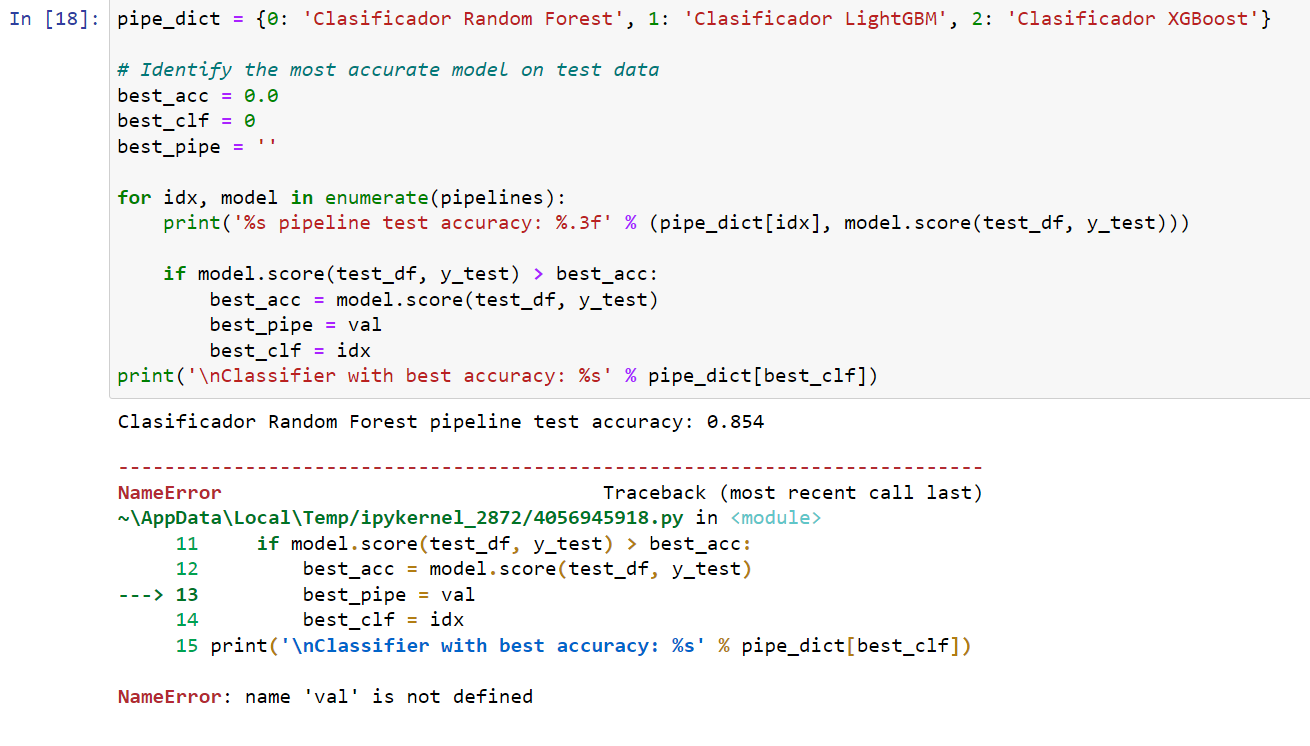

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn.externals
import joblib
from sklearn import svm
from sklearn import tree

In [2]:
# import pandas as pd
# train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
# test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
#                       skiprows = 1, header = None) # Make sure to skip a row for the test set
# col_labels = ['edad', 'clase_trabajo', 'Ingresos_censo_adultos ', 'educacion', 'nro_educacional',
#               'estado_civil', 'ocupacion', 
#               'relacion', 'raza', 'sexo', 'ganancia-capital ', 'perdida_capital', 'horas_emana ', 'patria',
#              'clase_salario']
# train_set.columns = col_labels
# test_set.columns = col_labels
# train_set.to_csv('./train_edu.csv',index=False)
# test_set.to_csv('./test_edu.csv',index=False)

<a id='dataset'></a>
# 2. Dataset

Se pide:
- Importa los datasets de entrenamiento y testeo disponibles en la carpeta con el ejercicio.

**3 líneas aprox.**

In [3]:
import pandas as pd

train_df = pd.read_csv('./train_edu.csv')
test_df = pd.read_csv('./test_edu.csv')

<a id='analisis'></a>
# 3. Análisis

- ### 3.1. ¿De qué tipo son los datos?

**1 línea aprox**

In [4]:
# Que tipos de datos tenemos
train_df.dtypes

edad                        int64
clase_trabajo              object
Ingresos_censo_adultos      int64
educacion                  object
nro_educacional             int64
estado_civil               object
ocupacion                  object
relacion                   object
raza                       object
sexo                       object
ganancia-capital            int64
perdida_capital             int64
horas_emana                 int64
patria                     object
clase_salario              object
dtype: object

- ### 3.2. ¿Hay algun valor nulo en las columnas?

**1 línea aprox**

In [5]:
train_df.isnull().sum()

edad                       0
clase_trabajo              0
Ingresos_censo_adultos     0
educacion                  0
nro_educacional            0
estado_civil               0
ocupacion                  0
relacion                   0
raza                       0
sexo                       0
ganancia-capital           0
perdida_capital            0
horas_emana                0
patria                     0
clase_salario              0
dtype: int64


- ### 3.3. ¿Cuáles son los valores de la variable a predecir?

Se pide:
- Visualiza los distintos valores dentro de la clase `clase_salario`.

**1 línea aprox.**


In [6]:
train_df['clase_salario'].unique()

array([' <=50K', ' >50K'], dtype=object)

<a id='traintest'></a>
# 4. Entrenamiento y testeo

Se pide:
- Separa el dataset de entrenamiento y testeo siendo la columna `y_train` e `y_test` equivalentes a la columna `clase_salario`. La función [**`pop()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html) te puede ser de ayuda.
- Vuelve las variables categóricas de la variable a predecir en variables numéricas. La función [**`replace()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) te puede ayudar.

**6 líneas aprox.**

In [7]:
y_train = train_df['clase_salario']
y_test = test_df['clase_salario']
train_df.pop('clase_salario')
test_df.pop('clase_salario')
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: clase_salario, Length: 32561, dtype: object

In [8]:
y_train.replace({' <=50K': 0,  ' >50K': 1}, inplace = True)
y_test.replace({' <=50K.': 0,  ' >50K.': 1}, inplace = True)

Afortunadamente, este conjunto de datos no tiene valores perdidos. Aunque parece que todas las características son numéricas, en realidad hay algunas características categóricas que debemos identificar. Por el bien de la ilustración, lo tratarémos como si tuvieran valores perdidos. 

Primero, filtremos algunas características, obviamente inútiles para este dataset, pero lo tendremos como ejemplo. 

<a id='pipeline'></a>
# 5. El Pipeline

El parámetro principal de una `pipeline` en la que trabajaremos son los "pasos". Es decir,una "lista de (nombre, proceso) que están encadenadas en el orden, con el último objeto un estimador.

Ejemplo: 
<blockquote>
    <pre class="nd ne nf ng nh ni nj nk"><span class="ic nl md gv nm b df nn no s np"><span style="background-color: rgb(247, 218, 100);">Pipeline</span>(steps=[(&apos;<span style="color: rgb(226, 80, 65);">nombre del proceso</span>&apos;, <strong>proceso()</strong>),
                (&apos;<span style="color: rgb(235, 107, 86);">nombre modelo</span>&apos;, <strong>modelo()</strong>)])</span></pre>
</blockquote>



In [9]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<a id='typedata'></a>
# 6. Tipos de datos

En primer lugar, necesitamos definir los transformadores para características tanto numéricas como categóricas. 
Se adjunta el objeto para trabajar con las columnas numéricas del dataset. Aún nos falta definir lcómo vamos a trabajar con variables categóricas. 

In [10]:
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )

Se pide:
- Define el nombre del transformador de las variables categóricas.
- El primer paso vá a ser el uso de [**`SimpleImputer()`**](https://interactivechaos.com/es/python/function/simpleimputer) para eliminar valores faltantes. La estrategia la dejamos a vuestro criterio.
- El siguiente uso que vamos a darle es el uso de [**`LabelEnconding()`**](https://interactivechaos.com/es/manual/tutorial-de-machine-learning/label-encoding). Como este **no acepta** el uso de tuberías usaremos su equivalente [**`OrdinalEncoder`**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html). Esto nos servirá para codificar las características categóricas. 

**1 línea aprox.**

In [11]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

<a id='rightcols'></a>
# 7. Las columnas adecuadas

Lo siguiente que debemos hacer es especificar qué columnas son numéricas y cuáles son categóricas, para que podamos aplicar los transformadores en consecuencia. 
Aplicamos los transformadores a las características mediante la propiedad  [**`ColumnTransformer()`**](https://www.it-swarm-es.com/es/python/como-usar-sklearn-column-transformer/809443066/). La cual aplica los procesos a ciertas columnas seleccionadas por nosotros.

**3 líneas aprox.**

In [12]:
numeric_features = train_df.select_dtypes('int64').columns
objects_features = train_df.select_dtypes('object').columns

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, objects_features)
]) 

<a id='model'></a>
# 8. El modelo

Después de ensamblar nuestro preprocesador de columnas, podemos agregar el modelo, que es el algoritmo de aprendizaje automático. Dado que en este caso, la variable de destino es continua, aplicarémos el modelo de regresión aleatoria de bosque.

Se pide:
- Crea el pipeline final.

Se adjunta un ejemplo [aquí](https://www.analyticslane.com/2019/02/04/automatizacion-del-procesado-de-datos-en-scikit-learn-con-pipeline/).

**2 líneas aprox.**

In [13]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier(max_depth=2, random_state=0))
           ])

Para crear el modelo, similar a lo que solíamos hacer con un algoritmo de aprendizaje automático, usamos la función "ajustar" o `fit` de la canalización. 

Se pide:
- Ajusta el modelo y visualiza el resultado con un simple `print`.

**2 líneas aprox.**

In [14]:
rf_model = pipeline.fit(train_df, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['edad', 'Ingresos_censo_adultos ', 'nro_educacional',
       'ganancia-capital ', 'perdida_capital', 'horas_emana '],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                     

<a id='metrics'></a>
# 9. Evaluando el modelo

###  De estos dos cúal sirve?¿

Predice los valores en el dataset de testeo y...elíge.

> ¿Cuál crees que es la métrica que nos sirve en nuestro caso?

- a) Error Absoluto medio, [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

- b) Precisión, [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

- c) Precisión de aciertos y fallos , [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

Se pide:
- Prueba las 3 métricas y decide.

**8 líneas aprox.**

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


results = rf_model.predict(test_df)


recall = recall_score(results, y_test, average='macro')
accuracy = accuracy_score(results, y_test)
mae = mean_absolute_error(results, y_test)
accuracy, mae, recall

(0.807198575026104, 0.19280142497389596, 0.8925373624019899)

<a id='beyond'></a>
# 10. Un paso más allá

Qué pasa si cada modelo funciona mejor en una casuística distinta. Es verdad que no nos podemos casar con ningun lenguaje de programación. También debemos de aplicar este concepto a la hora de elegir modelos. Por ello, al igual que hemos visto anteriormente en las tareas `GridSearch` y `BayesianSearch`, por que no hacer un canal para probar distintos modelos y ver cual funciona mejor?

Lo que haremos a continuación es construir 3 pipelines , cada una con un estimador diferente (algoritmo de clasificación), usando hiperparámetros predeterminados:

- Random Forest...**¡hecho!**
- [LightGBM](https://www.kaggle.com/macespinoza/clasificador-simple-lightgbm-espa-ol) para clasificación...
- Mi favorito, [XGBoost](https://ichi.pro/es/ejemplo-de-clasificacion-de-etiquetas-multiples-con-multioutputclassifier-y-xgboost-en-python-167986044155807)...

Se pide:
- Prepara un `Pipeline` para cada modelo basandote en el modelo creado.

**4 líneas aprox.**

In [16]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# fit model no training data
pipe_rf = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])


pipe_xg = Pipeline([
                ('preprocessor', preprocessor),
                ('clf', XGBClassifier())
            ])

pipe_gbm = Pipeline([
                ('preprocessor', preprocessor),
                ('clf', LGBMClassifier())
            ])

> Una vez creados los tres pipes de los modelos. Vamos a entrenarlos mediante la propiedad `fit`. 

Se pide:
- Genera una lista con las distintas "tuberías" creadas a partir de los modelos.
- Genera un bucle for para ir ajustando cada objeto `pipe` dentro del bucle con la propiedad `fit`.

**3 líneas aprox**

In [17]:

# List of pipelines for ease of iteration
pipelines = [pipe_rf, pipe_xg, pipe_gbm]

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(train_df, y_train)

Compara las precisiones de los distintos modelos. Para ello, una vez más ejecutaremos un bucle y calcularemos el resultado de cada modelo.
Por último, visualizaremos los resultados.

Se pide:
- Mediante un bucle for, calcula con la métrica de precisión, el resultado del modelo.
-Visualiza los resultados. La métrica [**`accuracy`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) te puede ser de ayuda.
- Guarda el modelo que mejor resultado tenga.

**7 líneas aprox. líneas aprox.**

In [19]:
pipe_dict = {0: 'Clasificador Random Forest', 1: 'Clasificador LightGBM', 2: 'Clasificador XGBoost'}

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''

for idx, model in enumerate(pipelines):
    print('%s pipeline test accuracy: %.5f' % (pipe_dict[idx], model.score(test_df, y_test)))
    
    if model.score(test_df, y_test) > best_acc:
        best_acc = model.score(test_df, y_test)
        best_pipe = model
        best_clf = idx
print('\nClassifier with best accuracy: %s' % pipe_dict[best_clf])

Clasificador Random Forest pipeline test accuracy: 0.85437
Clasificador LightGBM pipeline test accuracy: 0.87009
Clasificador XGBoost pipeline test accuracy: 0.87200

Classifier with best accuracy: Clasificador XGBoost


<a id='conclusions'></a>
<h2><span style="font-family: Arial, Helvetica, sans-serif; color: rgb(41, 105, 176); font-size: 30px;">
    11. Conclusiones</span></h2>
    
Estamos llegando a la recta final del Segundo modulo. En esta tarea hemos visto el uso de los canales. Cabe tener en cuenta que los `Pipelines` son muy potentes, pero únicamente nos servirán a la hora de trabajar con datos que hayamos trabajado anteriormente y de los cuales sepamos cómo funcionan o de que pecan.

Por ejemplo, podríamos usar esta tecnología a la hora de haber creado un modelo chulo con un cliente y debido a los problemas para extraer datos a tiempo real nos vayan entregando los datos de manera periódica (semanal) mediante una API.

<img src="https://media1.tenor.com/images/de8317df9cded7bc6773ef193f2aaf8a/tenor.gif"
 width="600"
 height="250"
 title="Fuente: Real life pipelines - www.quora.com">
 
En ese caso, tener un conducto automatizado para poder darle una respuesta rápida al cliente es fundamental.
En las próximas publicaciones, veremos estos problemas adicionales y veremos cómo encajar estas piezas para hacer que el uso de las canalizaciones sea mucho más poderoso de lo que parece en nuestro ejemplo inicial.
> @Egger, que sepas que has empezado a crear plantillas muy interesantes para poder usar en el futuro en ejemplos reales.







<a id='fuentes'></a>
# 12. Fuentes


.
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Gridsearch - <a href="https://www.analyticslane.com/2018/07/02/gridsearchcv/">Analyticslane</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Selecci&oacute;n autom&aacute;tica de modelos - <a href="https://www.analyticslane.com/2019/02/18/seleccionar-automaticamente-los-modelos-en-python-con-gridsearchcv/">Analyticslane</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Pipelines use II - <a href="https://medium.com/datos-y-ciencia/gesti%C3%B3n-de-flujos-de-trabajo-de-aprendizaje-autom%C3%A1tico-con-pipelines-de-scikit-learn-parte-2-eeecab194d83">Medium-MateoMayo</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Pipelines use I - <a href="https://medium.com/datos-y-ciencia/gesti%C3%B3n-de-flujos-de-trabajo-de-machine-learning-con-pipelines-de-scikit-learn-parte-1-una-8a37fcc7c1d0">Medium-MateoMayo</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">ML pipelines - <a href="https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html">KDnugget</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Pandas and UCI dataset - <a href="https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution">Kaggle</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Automatic model selector &ndash; <a href="https://www.analyticslane.com/2019/02/18/seleccionar-automaticamente-los-modelos-en-python-con-gridsearchcv/">AnalyticsLane</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Cleaning data analysis using pandas &amp; pipes &ndash; <a href="https://towardsdatascience.com/cleaner-data-analysis-with-pandas-using-pipes-4d73770fbf3c">Toward Data Science</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">Pipelines &ndash; <a href="https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html">Cienciadedatos.net</a></span></p>
<p style='margin-top:0cm;margin-right:0cm;margin-bottom:8.0pt;margin-left:0cm;line-height:107%;font-size:11px;font-family:"Arial",sans-serif;'><span style="font-size: 16px;">M&eacute;tricas -<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">Scikit-Learn</a></span></p>